# Importing the Libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [4]:
data = pd.read_csv('FIFA21.csv',sep=';')
data.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [48]:
data.shape

(17981, 9)

## Removing the trailing white spaces in the Team column

In [70]:
data['team'] = data['team'].str.strip()

# Checking the null values

In [7]:
data.isnull().sum()

player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64

In [9]:
data.dtypes

player_id       int64
name           object
nationality    object
position       object
overall         int64
age             int64
hits            int64
potential       int64
team           object
dtype: object

## Top 10 countries that constitute most of the players

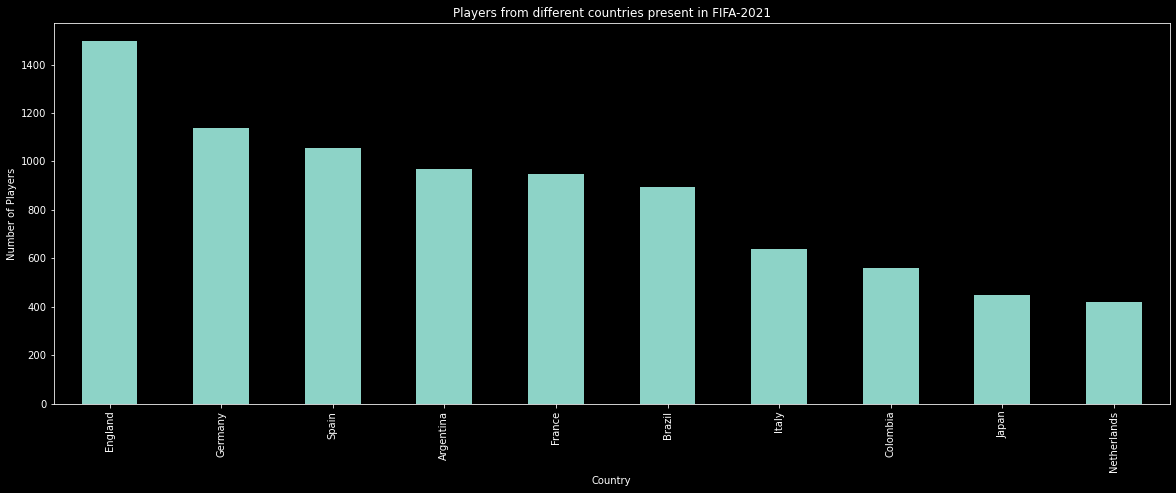

In [82]:
plt.figure(figsize = (20,7))
data['nationality'].value_counts().head(10).plot.bar()
plt.title('Players from different countries present in FIFA-2021')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()

# Number of players in a particular age group

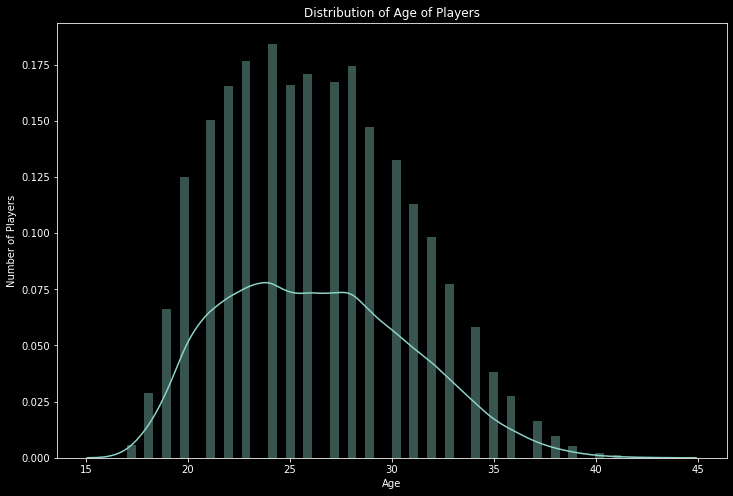

In [83]:
age  = data.age
plt.figure(figsize = (12,8))
ax = sns.distplot(age,bins = 60)
ax.set_ylabel('Number of Players')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age of Players')
plt.show()

## Potential Distribution

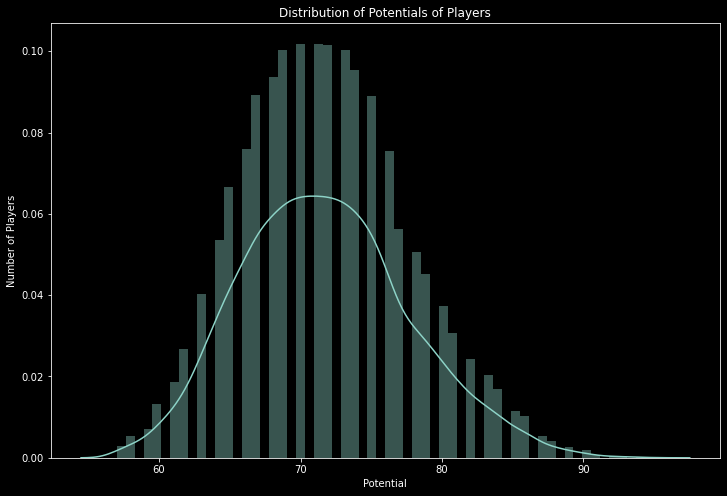

In [84]:
potential  = data.potential
plt.figure(figsize = (12,8))
ax = sns.distplot(potential,bins = 60)
ax.set_ylabel('Number of Players')
ax.set_xlabel('Potential')
ax.set_title('Distribution of Potentials of Players')
plt.show()

## The top 10 teams with highest overall player ratings

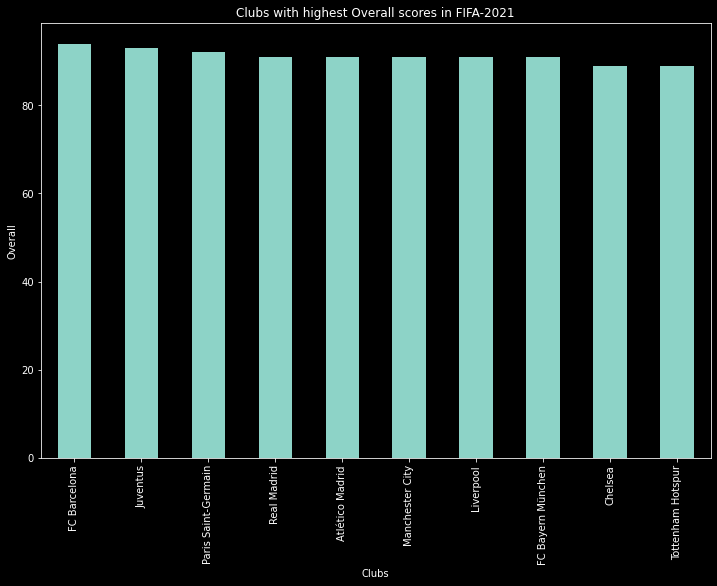

In [85]:
plt.figure(figsize=(12,8)) 
ax = data.groupby(['team'])['overall'].max().sort_values(ascending = False).head(10).plot.bar()
ax.set_xlabel('Clubs')
ax.set_ylabel('Overall')
ax.set_title("Clubs with highest Overall scores in FIFA-2021")
plt.show()

## Top 5 youngest players

In [31]:
data.sort_values('age',ascending=True)[['name', 'age', 'team', 'nationality']].head(5)

,name,age,team,nationality
1637,Eduardo Camavinga,17,Stade Rennais FC,France
15008,Gabriele Plechero,17,Cittadella,Italy
14915,Jayden Nelson,17,Toronto FC,Canada
17075,Tom Dickson-Peters,17,Norwich City,Scotland
17066,Elias Damergy,17,Stade Rennais FC,Tunisia


## Top 5 oldest players

In [32]:
data.sort_values('age',ascending=False)[['name', 'age', 'team', 'nationality']].head(5)

,name,age,team,nationality
13767,Hussain Omar Sulaimani,43,Al Ahli,Saudi Arabia
12887,Leao Butrón,43,Club Alianza Lima,Peru
14977,Luis Fernando Fernández,42,Sociedad Deportiva Aucas,Colombia
222,Gianluigi Buffon,42,Juventus,Italy
726,Hilton,42,Montpellier Hérault SC,Brazil


## Youngest and the oldest squads

In [35]:
data.groupby(['team'])['age'].mean().sort_values(ascending=True).head(10)

team
UCD AFC                  21.000000
FC Groningen             22.068966
FC Nordsjælland          22.157895
FC Bayern München II     22.240000
Fortuna Sittard          22.666667
SC Heerenveen            22.869565
KRC Genk                 23.000000
RB Leipzig               23.031250
OGC Nice                 23.115385
AZ                       23.142857
Name: age, dtype: float64

In [36]:
data.groupby(['team'])['age'].mean().sort_values(ascending=False).head(10)

team
Beijing Renhe FC                        31.333333
Tianjin Tianhai FC                      30.700000
Mineros de Guayana                      30.333333
Júbilo Iwata                            30.250000
Chongqing Dangdai Lifan FC SWM Team     30.166667
Guangzhou R&F FC                        30.117647
Tianjin TEDA FC                         30.055556
Shanghai Greenland Shenhua FC           30.043478
Perth Glory                             30.000000
Gyeongnam FC                            29.916667
Name: age, dtype: float64

## Position wise Top Players

### Central Defenders

In [40]:
data[data['position'] == 'CB'][['name', 'age', 'team', 'nationality']].head(10)

,name,age,team,nationality
3,Virgil van Dijk,29,Liverpool,Netherlands
21,Sergio Ramos,34,Real Madrid,Spain
25,Kalidou Koulibaly,29,Napoli,Senegal
33,Piqué,33,FC Barcelona,Spain
34,Giorgio Chiellini,35,Juventus,Italy
37,Aymeric Laporte,26,Manchester City,France
49,Diego Godín,34,Inter,Uruguay
50,Mats Hummels,31,Borussia Dortmund,Germany
54,Thiago Silva,35,Paris Saint-Germain,Brazil
56,Milan Škriniar,25,Inter,Slovakia


### Central Midfielders

In [43]:
data[data['position'] == 'CM'][['name', 'age', 'team', 'nationality']].head(10)

,name,age,team,nationality
17,Toni Kroos,30,Real Madrid,Germany
18,Luka Modric,34,Real Madrid,Croatia
45,Parejo,31,Valencia CF,Spain
57,Frenkie de Jong,23,FC Barcelona,Netherlands
84,Arthur,23,FC Barcelona,Brazil
111,Ivan Rakitic,32,FC Barcelona,Croatia
127,Mateo Kovacic,26,Chelsea,Croatia
131,Allan,29,Napoli,Brazil
155,João Moutinho,33,Wolverhampton Wanderers,Portugal
161,Fabián,24,Napoli,Spain


### Strikers

In [44]:
data[data['position'] == 'ST'][['name', 'age', 'team', 'nationality']].head(10)

,name,age,team,nationality
6,Robert Lewandowski,31,FC Bayern München,Poland
12,Sergio Agüero,32,Manchester City,Argentina
15,Harry Kane,27,Tottenham Hotspur,England
19,Luis Suárez,33,FC Barcelona,Uruguay
43,Ciro Immobile,30,Lazio,Italy
62,Timo Werner,24,RB Leipzig,Germany
64,Jamie Vardy,33,Leicester City,England
69,Mauro Icardi,27,Paris Saint-Germain,Argentina
72,Romelu Lukaku,27,Inter,Belgium
78,Edinson Cavani,33,Paris Saint-Germain,Uruguay


### Goalkeepers

In [45]:
data[data['position'] == 'GK'][['name', 'age', 'team', 'nationality']].head(10)

,name,age,team,nationality
4,Jan Oblak,27,Atlético Madrid,Slovenia
8,Alisson,27,Liverpool,Brazil
11,Marc-André ter Stegen,28,FC Barcelona,Germany
20,Manuel Neuer,34,FC Bayern München,Germany
22,Ederson,26,Manchester City,Brazil
27,De Gea,29,Manchester United,Spain
28,Thibaut Courtois,28,Real Madrid,Belgium
32,Samir Handanovic,36,Inter,Slovenia
42,Keylor Navas,33,Paris Saint-Germain,Costa Rica
47,Wojciech Szczesny,30,Juventus,Poland


## Correlation between the columns

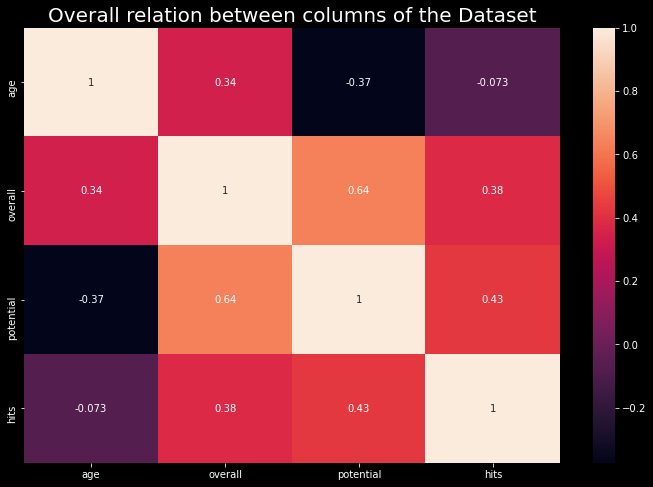

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(data[['age', 'nationality', 'overall', 'potential', 'team', 'hits', 'position']].corr(), annot = True)
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()

 ## Method to check the  individual player information

In [60]:
def player(x):
    return data.loc[data['name']==x]

## Method to check the information of any country's football team

In [61]:
def country(x): 
    return data[data['nationality'] == x][['name','overall','potential','position','hits','age','team']]

## Method to check the the club's player details

In [62]:
def club(x): 
    return data[data['team'] == x][['name','overall','potential','position','hits','age']]

## Method to get players with similar overall ratings

In [63]:
def overall(x): 
        return data[data['overall'] == x][['name','overall','potential','position','hits','age','team']]

In [64]:
player('Lionel Messi')

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona


In [73]:
country('India').head(10)

,name,overall,potential,position,hits,age,team
11885,Gajodara Chatterjee,64,64,GK,1,35,Free Agents
13068,Bhadrashree Raj,63,63,RB,1,32,Free Agents
13069,Prakul Bhatt,63,63,ST,3,35,Free Agents
14135,Anvit Swaminathan,62,62,LM|CAM,2,28,Free Agents
14136,Hantidev Bhandari,62,62,RM|LM,0,31,Free Agents
14137,Abhimoda Chakraborty,62,62,CB,0,34,Free Agents
15058,Devindra Pillai,61,61,RM|RW,0,32,Free Agents
15824,Anuvinda Khurana,60,62,CB,2,27,Free Agents
15825,Adit Ginti,60,62,LB|LM,3,26,Free Agents
15826,Remil Nadkarni,60,60,CAM|CF,1,34,Free Agents


In [72]:
club('FC Barcelona').head(10)

,name,overall,potential,position,hits,age
0,Lionel Messi,94,94,ST|CF|RW,299,33
11,Marc-André ter Stegen,90,93,GK,68,28
16,Antoine Griezmann,89,89,ST|CF|LW,66,29
19,Luis Suárez,89,89,ST,54,33
29,Sergio Busquets,88,88,CDM,34,32
33,Piqué,88,88,CB,41,33
57,Frenkie de Jong,86,92,CM,126,23
59,Clément Lenglet,86,90,CB,58,25
74,Jordi Alba,86,86,LB,35,31
84,Arthur,85,90,CM,64,23


In [74]:
overall(93)

,name,overall,potential,position,hits,age,team
1,Cristiano Ronaldo,93,93,ST|LW,276,35,Juventus


## Understanding the relation between Age and Performance

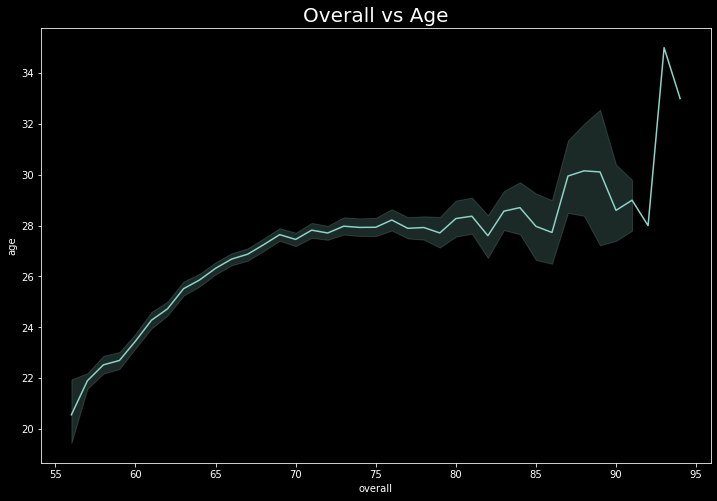

In [77]:
plt.figure(figsize=(12,8)) 
sns.lineplot(data['overall'], data['age'])
plt.title('Overall vs Age', fontsize = 20)
plt.show()

## Relation between Potential and Age

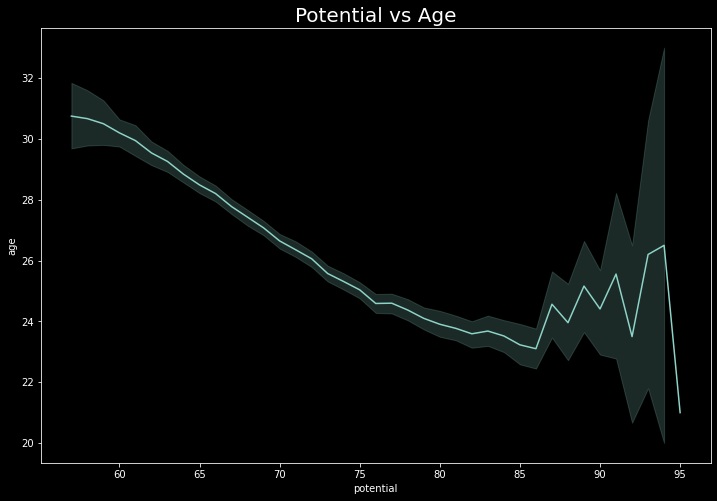

In [78]:
plt.figure(figsize=(12,8)) 
sns.lineplot(data['potential'], data['age'])
plt.title('Potential vs Age', fontsize = 20)
plt.show()